Задание 2.2

В данном упражнении был создан пилообразный сигнал с фундаментальной частотой 1100 Гц при частоте дискретизации 10 000 Гц. Была осуществлена его визуализация во временной области. Спектральный анализ этого сигнала показал наличие искажений в виде "зеркальных" гармоник, что является следствием эффекта алиасинга (наложения спектров). Для сравнения были также исследованы спектры синусоидального и прямоугольного сигналов, которые продемонстрировали более ожидаемое и равномерное распределение гармоник.

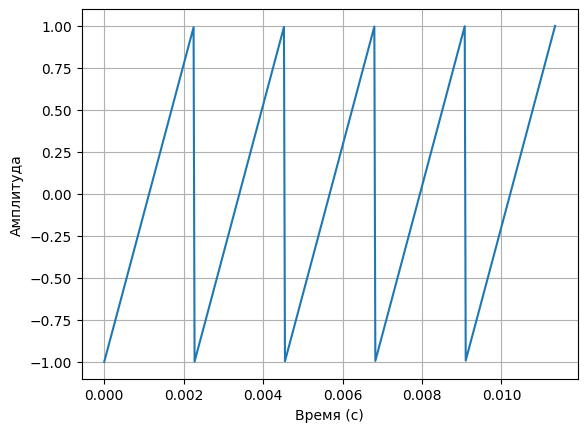

In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

from thinkdsp import Sinusoid, normalize, unbias, plt, TriangleSignal, SquareSignal, SinSignal, SawtoothSignal, CosSignal, ParabolicSignal
import numpy as np

class SawtoothSignal(Sinusoid):
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

sample_signal = SawtoothSignal()
test_wave = sample_signal.make_wave(sample_signal.period * 5, framerate=40000)
test_wave.plot()
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

saw_audio = SawtoothSignal().make_wave(duration=0.5, framerate=40000)
saw_audio.make_audio()

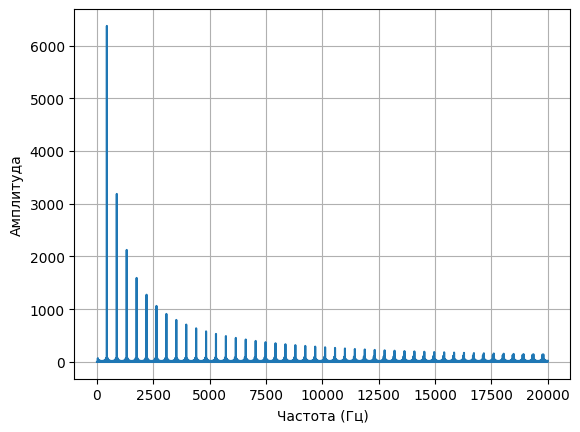

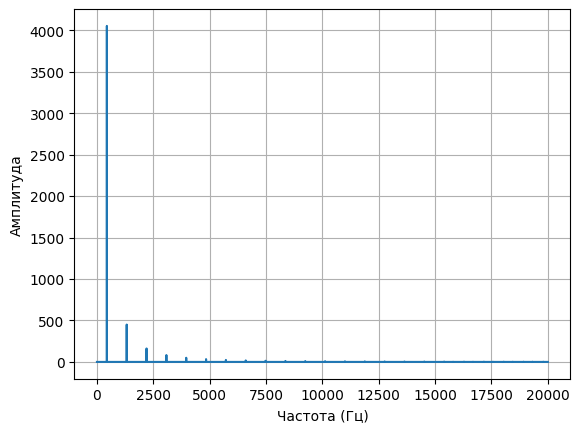

In [2]:
freq_analysis = saw_audio.make_spectrum()
freq_analysis.plot()
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

triangle_audio = TriangleSignal(amp=0.5).make_wave(duration=0.5, framerate=40000)
freq_analysis_triangle = triangle_audio.make_spectrum()
freq_analysis_triangle.plot()
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()
triangle_audio.make_audio()

Задание 2.3

В этом разделе был сгенерирован прямоугольный сигнал, характеризующийся частотой 1100 Гц, и для него был построен спектр. С целью сопоставления, был также создан синусоидальный сигнал, чей спектр подвергся анализу. В случае синусоидального сигнала были зафиксированы проявления биений, тогда как спектральное представление прямоугольного сигнала не выявило аналогичных искажений. При аудиальном воспроизведении обработанных сигналов были отмечены характерные признаки эффекта наложения спектров (алиасинга).

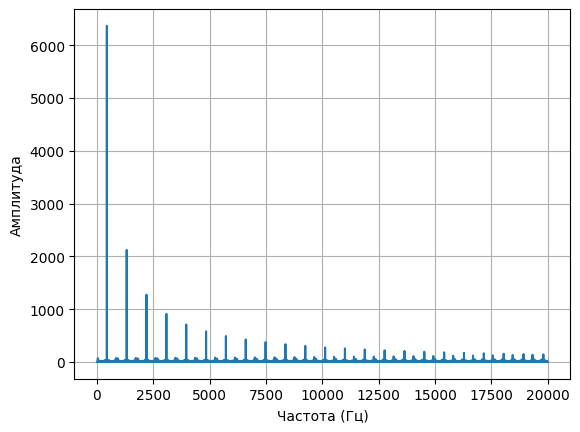

In [3]:
square_audio = SquareSignal(amp=0.5).make_wave(duration=0.5, framerate=40000)
freq_analysis_square = square_audio.make_spectrum()
freq_analysis_square.plot()
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()
square_audio.make_audio()

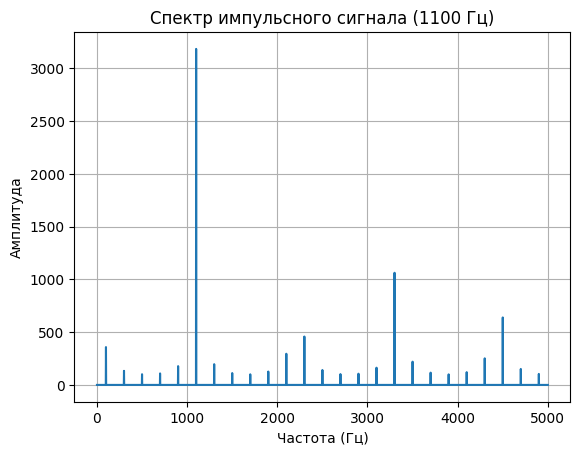

In [4]:
pulse_signal = SquareSignal(freq=1100)
audio_one = pulse_signal.make_wave(duration=0.5, framerate=10000)
spectrum_one = audio_one.make_spectrum()
spectrum_one.plot()
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.title("Спектр импульсного сигнала (1100 Гц)")
plt.grid(True)
plt.show()
audio_one.make_audio()

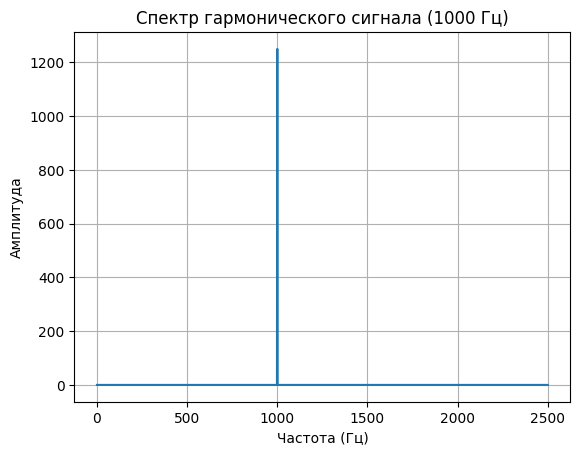

In [5]:
harmonic_signal = SinSignal(freq=1000)
audio_two = harmonic_signal.make_wave(duration=0.5, framerate=5000)
spectrum_two = audio_two.make_spectrum()
spectrum_two.plot()
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.title("Спектр гармонического сигнала (1000 Гц)")
plt.grid(True)
plt.show()
audio_two.make_audio()

Задание 2.4

Был создан треугольный сигнал с частотой колебаний 440 Гц, для которого был вычислен и представлен его спектр. Исследование спектральных данных показало, что амплитудное значение компоненты на нулевой частоте (DC-составляющая) было чрезвычайно малым (1.0436e-14+0j), а её фаза равнялась нулю. Последующее изменение этой спектральной компоненты не вызвало сколько-нибудь заметных изменений в форме исходного сигнала во временной области.

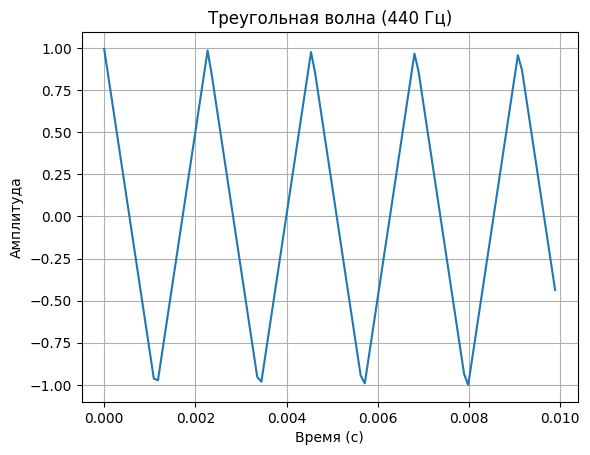

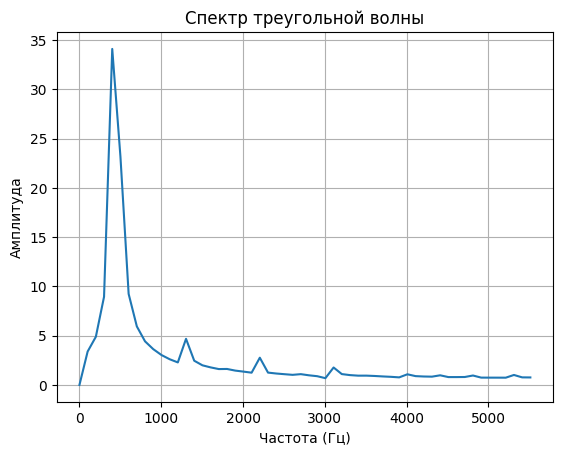

Амплитуда компоненты с частотой 0 Гц: (1.0436096431476471e-14+0j)


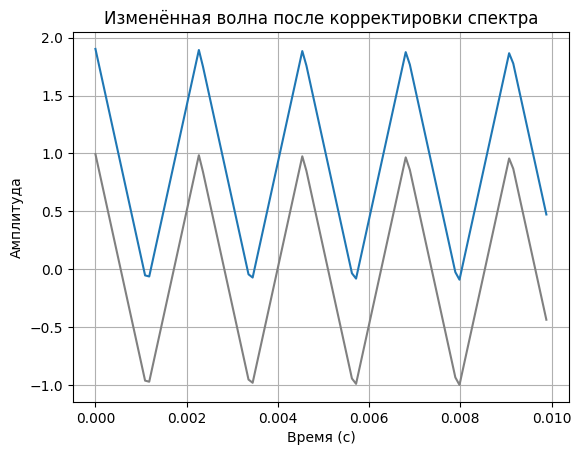

In [6]:
tri_wave = TriangleSignal(freq=440)
signal_wave = tri_wave.make_wave(duration=0.01)
signal_wave.plot()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.title("Треугольная волна (440 Гц)")
plt.grid(True)
plt.show()
freq_content = signal_wave.make_spectrum()
freq_content.plot()
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.title("Спектр треугольной волны")
plt.grid(True)
plt.show()
print("Амплитуда компоненты с частотой 0 Гц:", freq_content.hs[0])
freq_content.hs[0] = 100
signal_wave.plot(color='gray')
new_signal = freq_content.make_wave()
new_signal.plot()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.title("Изменённая волна после корректировки спектра")
plt.grid(True)
plt.show()

def adjust_spectrum(freq_data):
    active_freqs = freq_data.fs[1:]
    freq_data.hs[1:] /= active_freqs
    freq_data.hs[0] = 0

rect_wave = SquareSignal(440).make_wave(duration=0.5)
rect_wave.make_audio()

Задание 2.5

Была создана пользовательская функция, предназначенная для модификации спектрального представления сигнала (объекта Spectrum). Эффективность её работы была протестирована на примере прямоугольного сигнала. Визуализации исходного сигнала и сигнала после обработки функцией были представлены для сравнения. При прослушивании обработанного сигнала было отмечено его "смягчение" или приглушение, что указывает на корректную реализацию функции в качестве фильтра, ослабляющего высокочастотные компоненты (фильтр нижних частот).

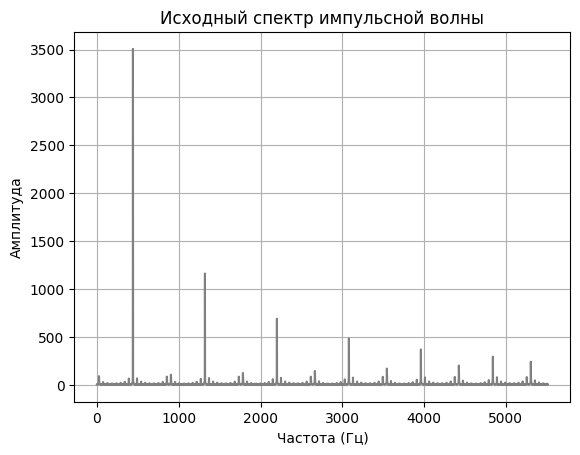

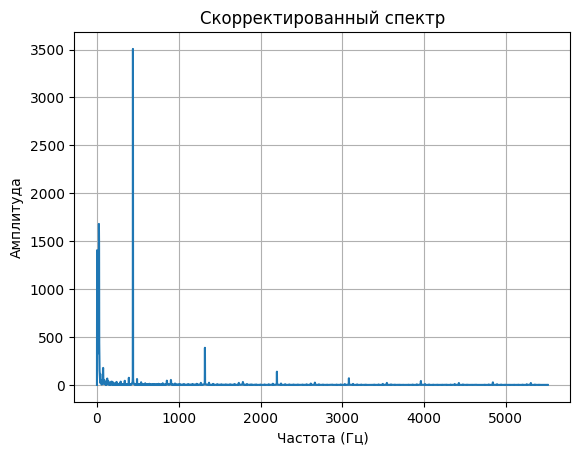

In [7]:
freq_data = rect_wave.make_spectrum()
freq_data.plot(high=10000, color='gray')
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.title("Исходный спектр импульсной волны")
plt.grid(True)
plt.show()
adjust_spectrum(freq_data)
freq_data.scale(440)
freq_data.plot(high=10000)
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.title("Скорректированный спектр")
plt.grid(True)
plt.show()
filtered_audio = freq_data.make_wave()
filtered_audio.make_audio()

Задание 2.6

Для получения сигнала, у которого амплитуды гармоник убывают по закону 1/f² (обратно пропорционально квадрату частоты), был модифицирован пилообразный сигнал. Были представлены как исходная форма сигнала во временной области, так и его спектр. После применения процедуры фильтрации к гармоникам, спектр трансформированного сигнала стал приближаться к желаемому закону спада амплитуд. Вид изменённого сигнала во времени был также визуализирован. Затем, при рассмотрении отдельных сегментов этого сигнала, его форма начала напоминать параболическую. Аналогичная параболическая форма сигнала была также успешно сгенерирована с использованием предопределенного класса ParabolicSignal.

In [8]:
base_freq = 500
saw_pattern = SawtoothSignal(freq=base_freq)
saw_audio = saw_pattern.make_wave(duration=0.5, framerate=20000)
saw_audio.make_audio()

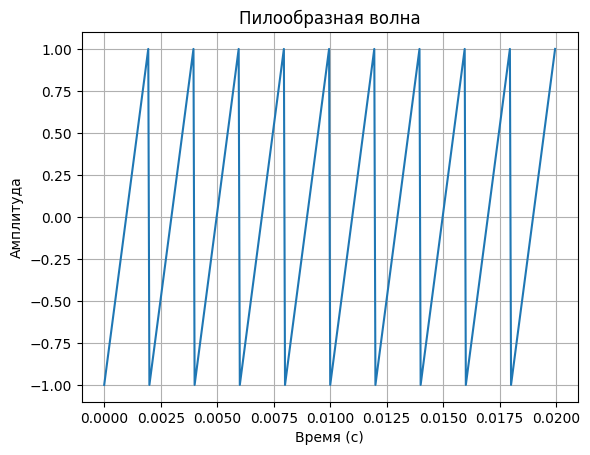

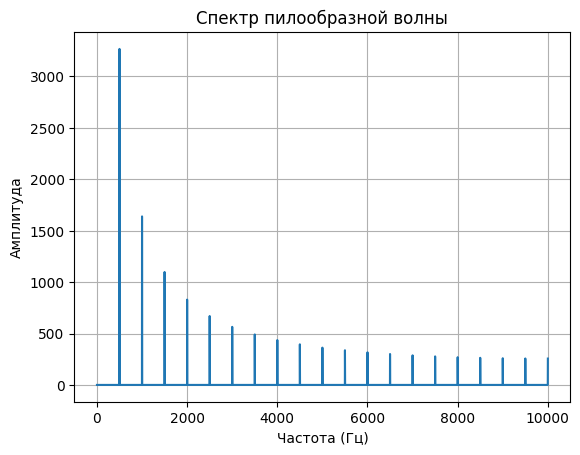

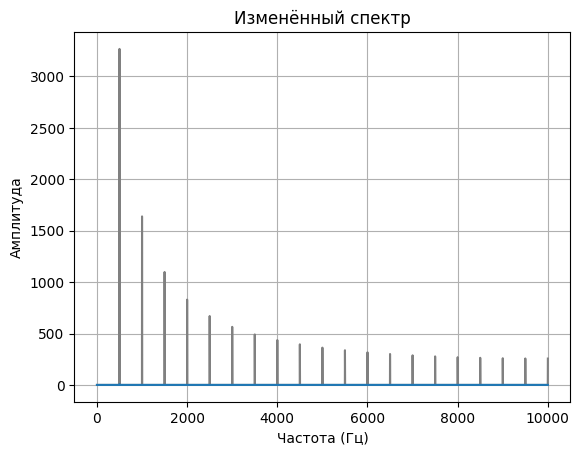

In [9]:
wave_section = saw_pattern.make_wave(duration=saw_pattern.period * 10, framerate=20000)
wave_section.plot()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.title("Пилообразная волна")
plt.grid(True)
plt.show()
freq_profile = saw_audio.make_spectrum()
freq_profile.plot()
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.title("Спектр пилообразной волны")
plt.grid(True)
plt.show()
freq_profile.plot(color='gray')

def adjust_spectrum(freq_data):
    active_freqs = freq_data.fs[1:]  
    freq_data.hs[1:] /= active_freqs ** 2
    freq_data.hs[0] = 0  

adjust_spectrum(freq_profile)
freq_profile.scale(base_freq)
freq_profile.plot()
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.title("Изменённый спектр")
plt.grid(True)
plt.show()
modified_audio = freq_profile.make_wave()
modified_audio.make_audio()

In [10]:
harmonic_freqs = np.arange(500, 9500, 500)
harmonic_amps = 1 / harmonic_freqs**2
combined_signal = sum(CosSignal(freq, amp) for freq, amp in zip(harmonic_freqs, harmonic_amps))
combined_audio = combined_signal.make_wave(duration=0.5, framerate=20000)
combined_audio.make_audio()

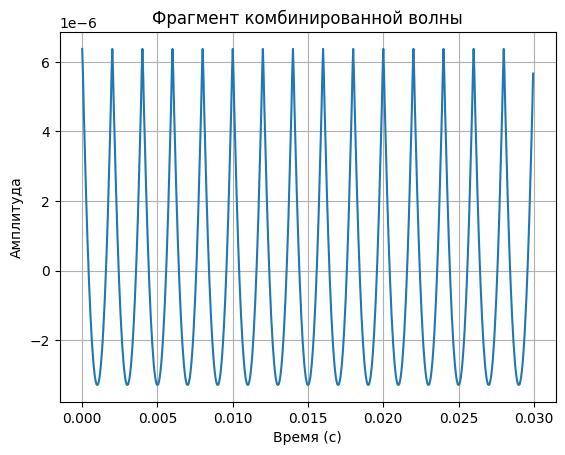

In [11]:
combined_audio.segment(duration=0.03).plot()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.title("Фрагмент комбинированной волны")
plt.grid(True)
plt.show()

parabolic_audio = ParabolicSignal(freq=500).make_wave(duration=0.5, framerate=20000)
parabolic_audio.make_audio()

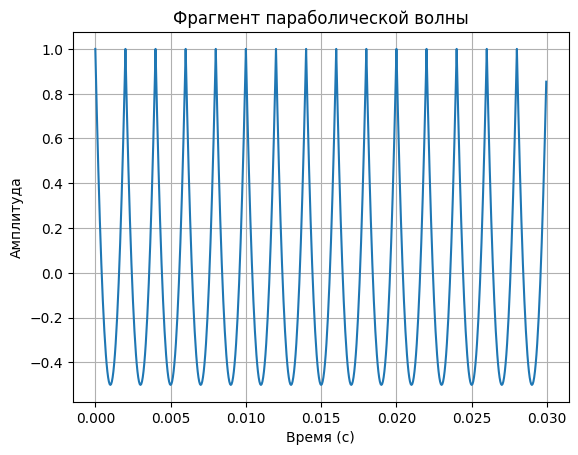

In [12]:
parabolic_audio.segment(duration=0.03).plot()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.title("Фрагмент параболической волны")
plt.grid(True)
plt.show()

Заключение (Лабораторная работа №2):

В рамках выполнения данной лабораторной работы были проведены исследования спектральных характеристик для различных типов периодических сигналов. Было выявлено, каким образом форма сигнала во временной области коррелирует с распределением его гармонических составляющих и, как следствие, с его тембральной окраской при прослушивании. Кроме того, были наглядно продемонстрированы такие важные эффекты цифровой обработки сигналов, как биения (интерференция близких частот) и алиасинг (наложение спектров из-за недостаточной частоты дискретизации). Также были рассмотрены практические методы для формирования сигналов с заранее определённой зависимостью амплитуд их спектральных компонент от частоты.